### Q2. Do you think we need a machine learning model to differentiate between static activities (laying, sitting, standing) and dynamic activities(walking, walking_downstairs, walking_upstairs)? Look at the linear acceleration (*acc*<sub>x</sub><sup>2</sup> + *acc*<sub>y</sub><sup>2</sup> + *acc*<sub>z</sub><sup>2</sup>) for each activity and justify your answer. [0.5 marks]


Importing Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Activity Labels

In [2]:
activity = ["LAYING", "SITTING", "STANDING", "WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"]
dir_path = os.path.join("..","HAR", "Combined", "train")
t = 10
freq = 50

Computing Acceleration

In [14]:
linear_acc_all = []
for action in activity:
    path = os.path.join(dir_path, action)
    files = os.listdir(path)
    sel_file = os.path.join(path, files[1])

    df = pd.read_csv(sel_file)

    df_first_500 = df[:t*freq]

    # print(df_first_500.columns) Just to check the column names

    acc_in_x = df_first_500['accx'].values
    acc_in_y = df_first_500['accy'].values
    acc_in_z = df_first_500['accz'].values

    acceleration = np.vstack((acc_in_x**2, acc_in_y**2, acc_in_z**2)).T
    liner_acceleration = np.sum(acceleration, axis=1)
    linear_acc_all.append(liner_acceleration)

linear_acc = np.array(linear_acc_all)

Plotting Linear Acceleration

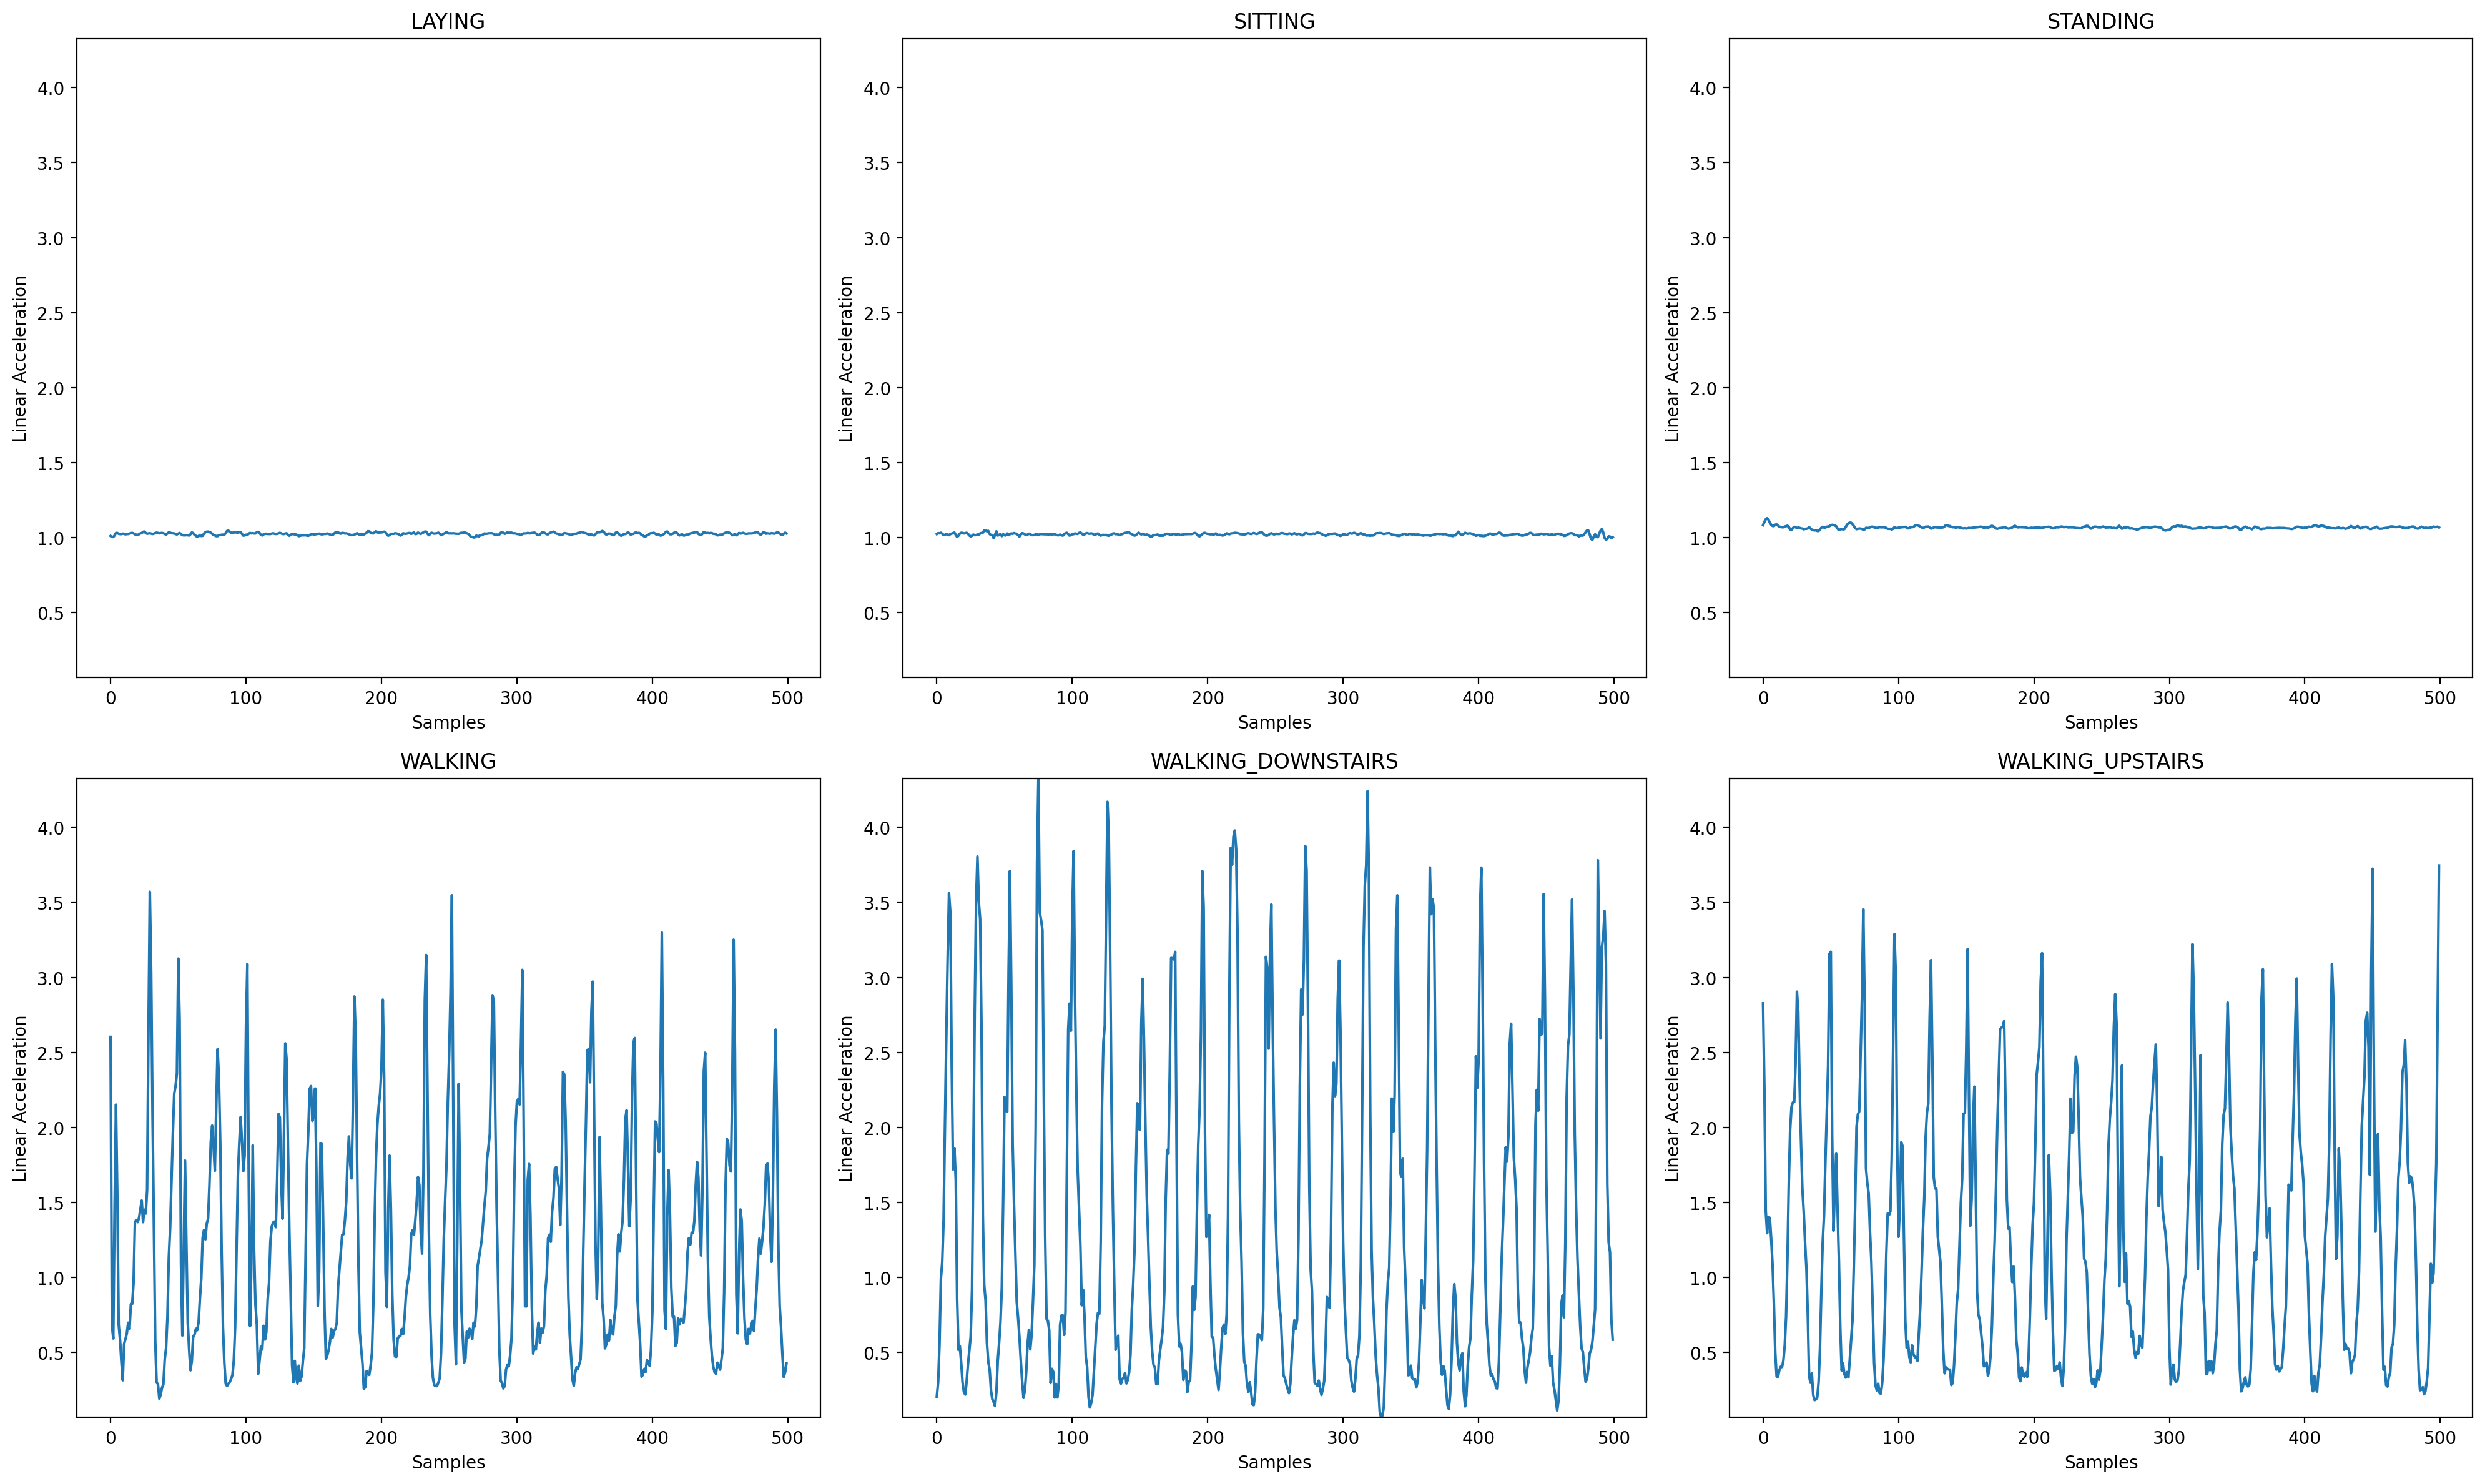

In [16]:
ymin = np.min(linear_acc_all)
ymax = np.max(linear_acc_all)

plt.figure(figsize=(20, 12))
for i in range(len(activity)):
    plt.subplot(2, 3, i+1)
    plt.plot(linear_acc[i])
    plt.title(activity[i])
    plt.xlabel('Samples')
    plt.ylabel('Linear Acceleration')
    plt.ylim(ymin, ymax)

plt.tight_layout()
plt.show()

Comparision using Mean and Standard Deviation

In [ ]:
static_activities = ['LAYING', 'SITTING', 'STANDING']
dynamic_activities = ['WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']

static_acc_avg = [np.mean(linear_acc[i]) for i in range(3)]
dynamic_acc_avg = [np.mean(linear_acc[i+3]) for i in range(3)]

print("Mean Linear Acceleration for Static Activities:", static_acc_avg)
print("Mean Linear Acceleration for Dynamic Activities:", dynamic_acc_avg)

static_acc_std = [np.std(linear_acc[i]) for i in range(3)]
dynamic_acc_std = [np.std(linear_acc[i+3]) for i in range(3)]

print("Standard Deviation of Linear Acczeleration for Static Activities:", static_acc_std)
print("Standard Deviation of Linear Acceleration for Dynamic Activities:", dynamic_acc_std)

Mean Linear Acceleration for Static Activities: [np.float64(1.0244617425960356), np.float64(1.0205906553392927), np.float64(1.0665279544926758)]
Mean Linear Acceleration for Dynamic Activities: [np.float64(1.214781460313424), np.float64(1.3096136841779782), np.float64(1.2504127032798875)]
Standard Deviation of Linear Acceleration for Static Activities: [np.float64(0.007457757533815072), np.float64(0.007812692503902645), np.float64(0.00868667321240001)]
Standard Deviation of Linear Acceleration for Dynamic Activities: [np.float64(0.7299440014749482), np.float64(1.110448694716241), np.float64(0.8221198417580775)]


#### No, we donot need a machine learning model to differentiate between static activities (laying, sitting, standing) and dynamic activities(walking, walking_downstairs, walking_upstairs). As we can see the standard deviation for the dynamic activities is much higher than that for static activities. So, we can set a threshold of around 0.05 and distinguish between dynamic and static activities.